# (Core) Project 1: Global Explanations
Task

    For this assignment, you will continue revisiting your first project to predict supermarket sales. You will be applying everything you've learned thus far this week to explain how your models made their predictions.

## Load Your Saved Joblib File

In [5]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
## Customization Options
pd.set_option("display.max_columns",100)
plt.style.use(['fivethirtyeight','seaborn-talk'])
mpl.rcParams['figure.facecolor']='white'
## additional required imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn import metrics
## fixing random for lesson generation
SEED = 321
np.random.seed(SEED)

C:\Users\tulan\AppData\Local\Temp\ipykernel_2132\730527515.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['fivethirtyeight','seaborn-talk'])


In [2]:
import joblib
loaded_joblib = joblib.load('best-models.joblib')
loaded.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'RandomForest', 'LinearRegression'])

In [3]:
X_train = loaded_joblib['X_train']
X_test = loaded_joblib['X_test']
y_train = loaded_joblib['y_train']
y_test = loaded_joblib['y_test']
preprocessor = loaded_joblib['preprocessor']
loaded_Forest = loaded_joblib['RandomForest']
loaded_Reg = loaded_joblib['LinearRegression']

## Explain your tree-based model with shap:

In [9]:
## fit random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
loaded_Forest.fit(X_train,y_train)
print(f"Training R^2: {loaded_Forest.score(X_train,y_train):.3f}")
print(f"Test R^2: {loaded_Forest.score(X_test, y_test):.3f}")



Training R^2: 1.000
Test R^2: 0.111


In [11]:
import shap
shap.initjs()

In [13]:
X_shap = shap.sample(X_train, nsamples=200, random_state=321)
X_shap


,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP
3888,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.698654,0.873252,-1.677139
2497,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.520761,0.418566,1.275305
7723,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.090017,-0.986085,0.684178
8117,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.499157,-0.316610,1.616527
7475,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.497042,-0.410893,-0.023898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4033,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.647414,-0.394155,-0.237582
3230,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.879847,1.104864,-0.668730
2341,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.176835,0.228139,-1.387437
823,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.544480,-0.631201,-0.494842


In [14]:
## get the corresponding y-values
y_shap = y_train.loc[X_shap.index]
y_shap


3888     759.0120
2497     663.1368
7723    2766.3990
8117    1225.0720
7475    1685.8056
          ...    
4033    1771.0280
3230    1416.8224
2341    1301.6390
823     1856.2504
6159     697.0926
Name: Item_Outlet_Sales, Length: 200, dtype: float64

In [15]:
explainer = shap.Explainer(loaded_Forest)
explainer

In [16]:
shap_values = explainer(X_shap,y_shap)
shap_values.shape

(200, 31)

## Create a summary plot - with plot_type='bar':

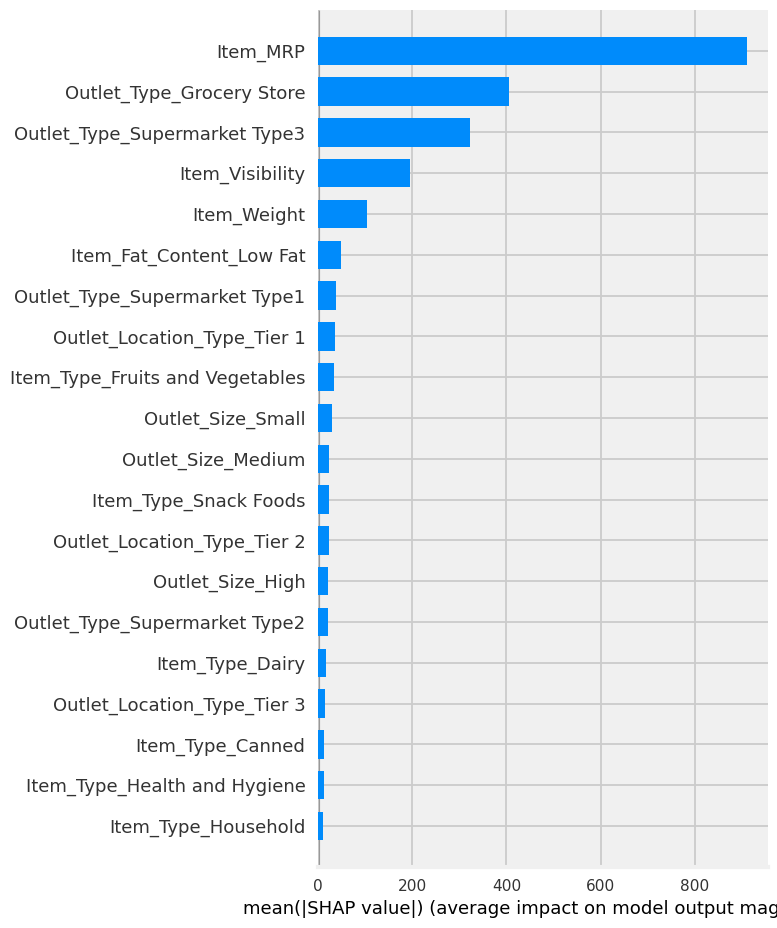

In [19]:
shap.summary_plot(shap_values,X_shap,  plot_type='bar')


### saved feature importance image 

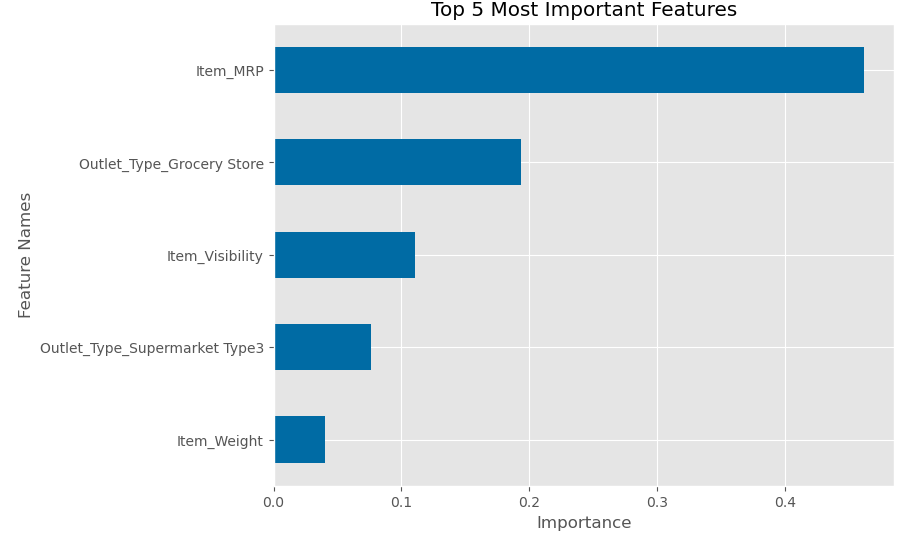

###  Are they the same features in both? If not, what's different?

The values are the same, but the visibility and supermarket type are flipped.

## Create a second summary plot - with plot_type='dot'

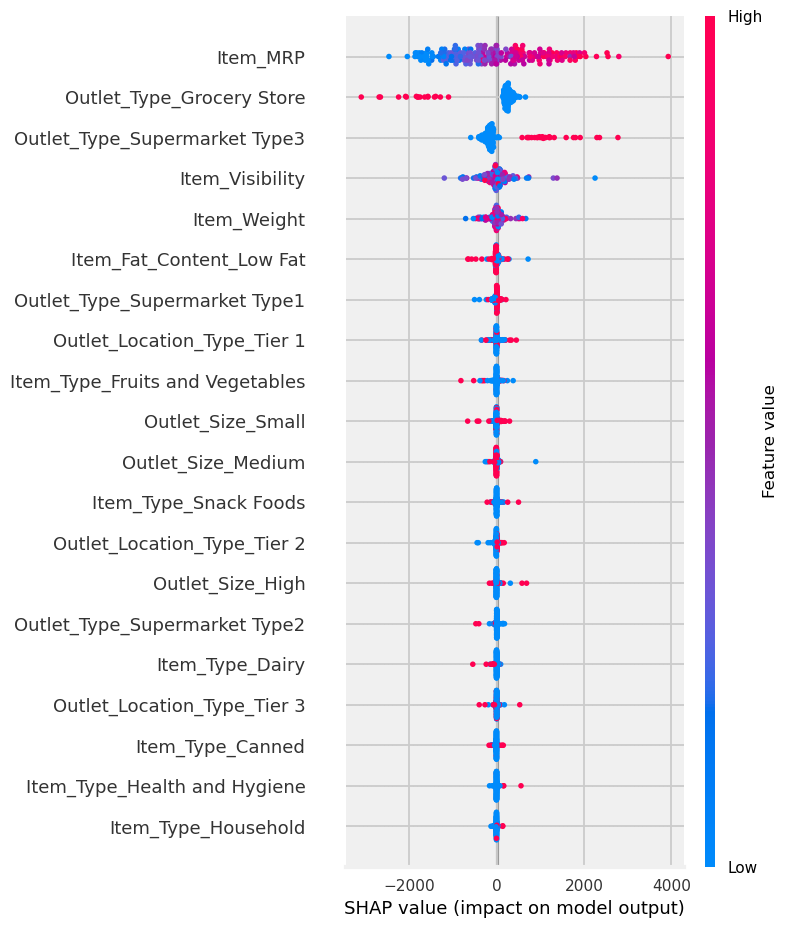

In [20]:
shap.summary_plot(shap_values,X_shap,  plot_type='dot')


### In a markdown cell, interpret the top 3 most important features and how they influence your model's predictions.

Item_MRP - The higher this is, the more likely the model is to give a high sale price.

Outlet_Type - the higher this is, the less likely the model is to give a high sale price.

Supermarket type 3 - type 3 Supermarkets tend to be predicted to have higher sale prices. 